In [2]:
#%reset
import os
rundir='/space/hall3/sitestore/eccc/crd/ccrn/users/rms101/SCRIPTS/cfc/'
os.chdir(rundir)
import sys
sys.path.append('../PMODS')

import os
import cmipdata as cd
import numpy as np
import matplotlib.pyplot as plt # for basic plotting
import rms_plots as rpl1
import rms_utils as rut
import matplotlib as mpl
import xarray as xr
import nc as nc
import rms_utils_boot as rutb
from matplotlib.ticker import MultipleLocator
import glob
from scipy import stats
################settings
#mpl.style.reload_library()
#plt.style.use('rms_paper')
ystart=1955;ystop=2005;nyear=ystop+1-ystart
ystartb=1955;ystopb=1975

registering cmaps
registering cmaps


In [3]:
# =====================================
# 1. Calculate and read data
# =====================================
files={'historical':[],'hist-GHG':[],'hist-totalO3':[],'hist-stratO3':[],'hist-noCFC':[],'hist-noCFC-noO3':[],'hist-noaerosol':[],'hist-noCO2':[]} 
rips={};nens={};data_lonlat={};data_latyear={}
# =====================================
# 1a. Calculate- annual means already done by CFC_TAS_Arc_Gm.ipynb 
# =====================================
datadir='/space/hall3/sitestore/eccc/crd/ccrn/users/rms101/DATA/cfc_post'
# =====================================
# 1b. Read 
# =====================================          

lon=nc.getvar('{}/DATA_tas_canesm5_past_hist-GHG/am_tas_Amon_CanESM5_hist-GHG_r1i1p1f1_gn_185001-202012.nc'.format(datadir),'lon');nlon=np.size(lon)
lat=nc.getvar('{}/DATA_tas_canesm5_past_hist-GHG/am_tas_Amon_CanESM5_hist-GHG_r1i1p1f1_gn_185001-202012.nc'.format(datadir),'lat');nlat=np.size(lat)

for forcing in files.keys():
    print forcing
    #files[forcing]=[]
    rips[forcing]=[]
    os.chdir('{}/DATA_tas_canesm5_past_{}'.format(datadir,forcing))
    #make file lists
    for i in range(1,51): 
        files[forcing].extend(glob.glob('am*_'+forcing+'_*r'+str(i)+'i1p1f1*'))
    for i in range(1,51): 
        files[forcing].extend(glob.glob('am*_'+forcing+'_*r'+str(i)+'i1p2f1*'))               
    #get rips
    nens[forcing]=len(files[forcing])
    for i in range(nens[forcing]):
        rips[forcing].append(files[forcing][i].split("_")[5])
        print forcing,rips[forcing][i]    
    #declare variables
    data_lonlat[forcing]=np.zeros((nens[forcing],nlat,nlon))*np.nan  
    data_latyear[forcing]=np.zeros((nens[forcing],nyear,nlat))*np.nan  

    #read data
    for i,file in enumerate(files[forcing]):
        tas=xr.open_dataset(file)
        data_lonlat[forcing][i,:,:]=tas.tas.sel(time=slice('1996-01-01', '2005-12-31')).mean(dim='time')-\
                             tas.tas.sel(time=slice('1955-01-01', '1964-12-31')).mean(dim='time')  
        data_latyear[forcing][i,:,:]=tas.tas.sel(time=slice('1955-01-01', '2005-12-31')).mean(dim='lon')-\
                             tas.tas.sel(time=slice('1955-01-01', '1964-12-31')).mean(dim='time').mean(dim='lon')  
os.chdir(rundir)



hist-noCFC-noO3
hist-noCFC-noO3 r1i1p2f1
hist-noCFC-noO3 r2i1p2f1
hist-noCFC-noO3 r3i1p2f1
hist-noCFC-noO3 r4i1p2f1
hist-noCFC-noO3 r5i1p2f1
hist-noCFC-noO3 r6i1p2f1
hist-noCFC-noO3 r7i1p2f1
hist-noCFC-noO3 r8i1p2f1
hist-noCFC-noO3 r9i1p2f1
hist-noCFC-noO3 r10i1p2f1
hist-noCFC-noO3 r11i1p2f1
hist-noCFC-noO3 r12i1p2f1
hist-noCFC-noO3 r13i1p2f1
hist-noCFC-noO3 r14i1p2f1
hist-noCFC-noO3 r15i1p2f1
hist-noCFC-noO3 r16i1p2f1
hist-noCFC-noO3 r17i1p2f1
hist-noCFC-noO3 r18i1p2f1
hist-noCFC-noO3 r19i1p2f1
hist-noCFC-noO3 r20i1p2f1
hist-noCO2
hist-noCO2 r1i1p2f1
hist-noCO2 r2i1p2f1
hist-noCO2 r3i1p2f1
hist-noCO2 r4i1p2f1
hist-noCO2 r5i1p2f1
hist-noCO2 r6i1p2f1
hist-noCO2 r7i1p2f1
hist-noCO2 r8i1p2f1
hist-noCO2 r9i1p2f1
hist-noCO2 r10i1p2f1
hist-noCO2 r11i1p2f1
hist-noCO2 r12i1p2f1
hist-noCO2 r13i1p2f1
hist-noCO2 r14i1p2f1
hist-noCO2 r15i1p2f1
hist-noCO2 r16i1p2f1
hist-noCO2 r17i1p2f1
hist-noCO2 r18i1p2f1
hist-noCO2 r19i1p2f1
hist-noCO2 r20i1p2f1
hist-GHG
hist-GHG r1i1p1f1
hist-GHG r2i1p1f1
hist-G

/home/rms101/.conda/envs/py2_rms_v2/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:5096: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return npsel.concatenate((a,a[slicer]),axis=axis)
/home/rms101/.conda/envs/py2_rms_v2/lib/python2.7/site-packages/matplotlib/contour.py:1230: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


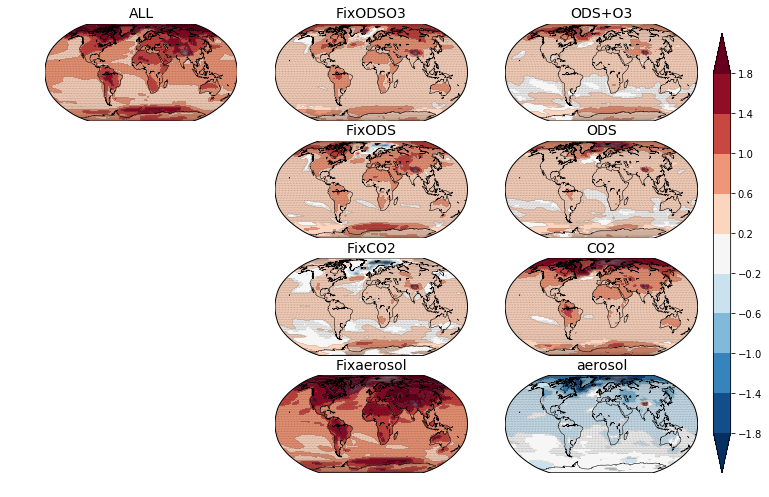

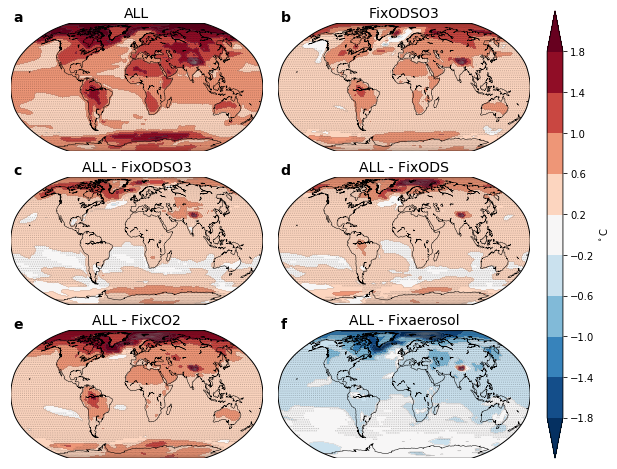

In [4]:
#==========================================================
#3. Plots  
#==========================================================
os.system('mkdir -p PLOTS')


labels={'historical':'ALL',
        'hist-GHG':'GHG',
        'hist-totalO3':'O3',
        'hist-stratO3':'O3S',
        'hist-noCFC':'FixODS',
        'hist-noCFC-noO3':'FixODSO3',
        'hist-noaerosol':'Fixaerosol',
        'hist-noCO2':'FixCO2'}

def plot_lonlat(ax,x,title,label=None):
        #bm
        bm=rpl1.make_bm(ax,**bmparams);
        #cf
        cf=rpl1.add_cf(bm,lon,lat,np.mean(x,axis=0),**cfparams)
        #sig
        sig=np.zeros([nlat,nlon])*np.nan
        sig[stats.ttest_1samp(x,0)[1]<0.05]=0.003
        lons,lats=np.meshgrid(lon,lat);bm.scatter(lons,lats,sig.squeeze(), facecolor='black',marker='x',latlon=True)
        #title
        rpl1.add_title(ax,title,label)
        return cf

def plot_lonlat_diff(ax,x1,x2,title,label=None):
        ##bm
        bm=rpl1.make_bm(ax,**bmparams);
        ##cf
        cf=rpl1.add_cf(bm,lon,lat,np.mean(x1,axis=0)-np.mean(x2,axis=0),**cfparams)
        ##sig
        sig=np.zeros([nlat,nlon])*np.nan
        sig[stats.ttest_ind(x1,x2)[1]<0.05]=0.003
        lons,lats=np.meshgrid(lon,lat);bm.scatter(lons,lats,sig.squeeze(), facecolor='black',marker='x',latlon=True)
        ##title
        rpl1.add_title(ax,title,label)
        return cf


#==========================================================
#3a. Maps of ODS and CO2 impacts
#==========================================================
bmparams=dict(region='glob_rob')
cfparams=dict(cint0=0.4,cmap='RdBu_r')
############### Setup fig
fig1, axs = plt.subplots(4,3, figsize=(12,8)); 
fig1.subplots_adjust(bottom=0.1,hspace=0.2,wspace=0.1)

############### historical

plot_lonlat(axs[0,0],data_lonlat['historical'],labels['historical'])
plot_lonlat(axs[0,1],data_lonlat['hist-noCFC-noO3'],labels['hist-noCFC-noO3'])
plot_lonlat_diff(axs[0,2],data_lonlat['historical'],data_lonlat['hist-noCFC-noO3'],'ODS+O3')

axs[1,0].axis('off')
plot_lonlat(axs[1,1],data_lonlat['hist-noCFC'],labels['hist-noCFC'])
plot_lonlat_diff(axs[1,2],data_lonlat['historical'],data_lonlat['hist-noCFC'],'ODS')

axs[2,0].axis('off')
plot_lonlat(axs[2,1],data_lonlat['hist-noCO2'],labels['hist-noCO2'])
plot_lonlat_diff(axs[2,2],data_lonlat['historical'],data_lonlat['hist-noCO2'],'CO2')

axs[3,0].axis('off')
plot_lonlat(axs[3,1],data_lonlat['hist-noaerosol'],labels['hist-noaerosol'])
cf=plot_lonlat_diff(axs[3,2],data_lonlat['historical'],data_lonlat['hist-noaerosol'],'aerosol')
rpl1.add_cb(axs[3,2],cf,lscale=4.5)

##save
#fig1.suptitle('TAS change')
rpl1.mysavefig(fig1,'PLOTS/tas_cfc_latlon_all.png')

#==========================================================
#3b. Maps of ODS and CO2 impacts 2 by 3
#==========================================================

############### Setup fig
fig2, axs = plt.subplots(3,2, figsize=(11,8)); 
fig2.subplots_adjust(hspace=0.2,wspace=0,right=0.8)

############### historical

plot_lonlat(axs[0,0],data_lonlat['historical'],labels['historical'],'a')
plot_lonlat(axs[0,1],data_lonlat['hist-noCFC-noO3'],labels['hist-noCFC-noO3'],'b')
plot_lonlat_diff(axs[1,0],data_lonlat['historical'],data_lonlat['hist-noCFC-noO3'],'ALL - '+labels['hist-noCFC-noO3'],'c')
plot_lonlat_diff(axs[1,1],data_lonlat['historical'],data_lonlat['hist-noCFC'],'ALL - '+labels['hist-noCFC'],'d')
plot_lonlat_diff(axs[2,0],data_lonlat['historical'],data_lonlat['hist-noCO2'],'ALL - '+labels['hist-noCO2'],'e')
cf=plot_lonlat_diff(axs[2,1],data_lonlat['historical'],data_lonlat['hist-noaerosol'],'ALL - '+labels['hist-noaerosol'],'f')
rpl1.add_cb(axs[2,1],cf,lscale=3.5,units='$^\circ$C')

##save
#fig1.suptitle('TAS change')
rpl1.mysavefig(fig2,'PLOTS/tas_cfc_latlon.png')






/home/rms101/.conda/envs/py2_rms_v2/lib/python2.7/site-packages/matplotlib/contour.py:1004: UserWarning: The following kwargs were not used by contour: 'latlon'
  s)


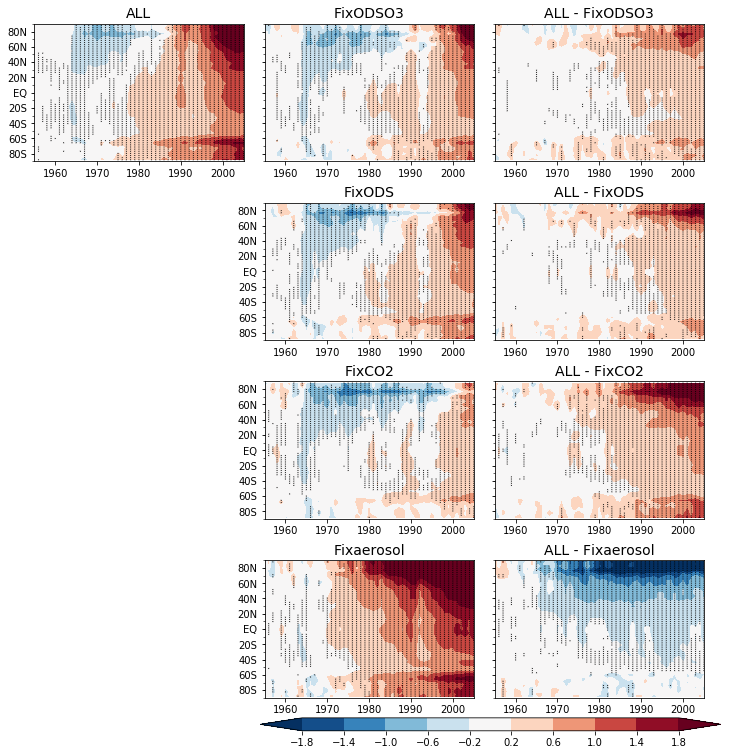

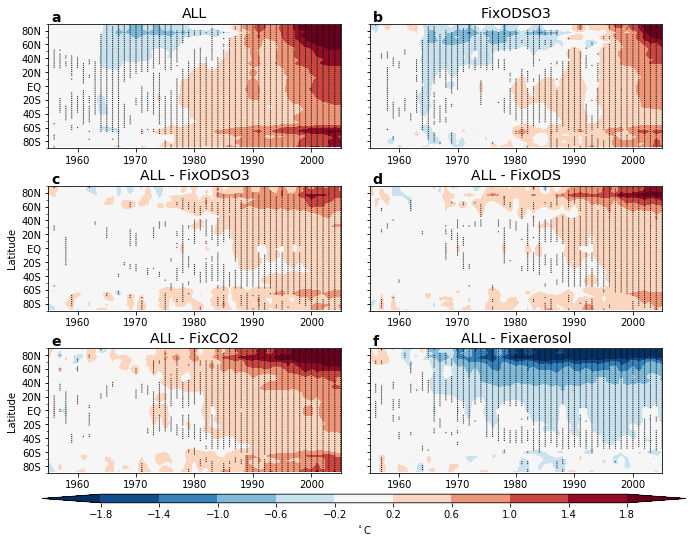

In [5]:
def ma(ax):
  ax.set_ylim(-90,90)
  ax.set_xlim(1955,2005)
  ax.yaxis.set_major_locator(MultipleLocator(20))
  ax.yaxis.set_minor_locator(MultipleLocator(10))    
  ax.yaxis.set_ticks_position('left')  
  ax.set_yticks(np.arange(-80,100,20))
  ax.set_yticklabels(('80S','60S','40S','20S','EQ', '20N', '40N', '60N','80N'))
  

year=np.arange(1955,2005+1);nyear=np.size(year)
cfparams=dict(cint0=0.3,plot_co=False,latlon=False,cmap='RdBu_r')

def plot_latyear(ax,x,title,label=None,plot_ylabel=True):
    #axes
    ma(ax); 
    if not plot_ylabel: ax.set_yticklabels((''))
    #cf
    cf=rpl1.add_cf(ax,year,lat,np.transpose(np.mean(x,axis=0)),**cfparams)  
    #sig
    sig=np.zeros([nyear,nlat])*np.nan
    sig[stats.ttest_1samp(x,0)[1]<0.05]=0.05
    lats,years=np.meshgrid(lat,year);ax.scatter(years,lats,sig, facecolor='black',marker='x')    
    #title
    rpl1.add_title(ax,title,label)
    return cf,sig    
    
def plot_latyear_diff(ax,x1,x2,title,label=None,plot_ylabel=True):
    #axes
    ma(ax)    
    if not plot_ylabel: ax.set_yticklabels((''))
    if plot_ylabel: ax.set_ylabel('Latitude')
    #cf
    cf=rpl1.add_cf(ax,year,lat,np.transpose(np.mean(x1,axis=0)-np.mean(x2,axis=0)),**cfparams)  
    #sig
    sig_diff=np.zeros([nyear,nlat])*np.nan
    sig_diff[stats.ttest_ind(x1,x2)[1]<0.05]=0.05
    lats,years=np.meshgrid(lat,year);ax.scatter(years,lats,sig_diff, facecolor='black',marker='x')    
    #title
    rpl1.add_title(ax,title,label)
    return cf    

#==========================================================
#3c. Hoffmoller plots of of ODS and CO2 impacts
#==========================================================
############### Setup fig
fig2, axs = plt.subplots(4,3, figsize=(12,12)); 
fig2.subplots_adjust(bottom=0.1,hspace=0.3,wspace=0.1)

plot_latyear(axs[0,0],data_latyear['historical'],labels['historical'])
plot_latyear(axs[0,1],data_latyear['hist-noCFC-noO3'],labels['hist-noCFC-noO3'],plot_ylabel=False)
plot_latyear_diff(axs[0,2],data_latyear['historical'],data_latyear['hist-noCFC-noO3'],'ALL - '+labels['hist-noCFC-noO3'],plot_ylabel=False)
axs[1,0].axis('off')
plot_latyear(axs[1,1],data_latyear['hist-noCFC'],labels['hist-noCFC'])
plot_latyear_diff(axs[1,2],data_latyear['historical'],data_latyear['hist-noCFC'],'ALL - '+labels['hist-noCFC'],plot_ylabel=False)
axs[2,0].axis('off')
plot_latyear(axs[2,1],data_latyear['hist-noCO2'],labels['hist-noCO2'])
plot_latyear_diff(axs[2,2],data_latyear['historical'],data_latyear['hist-noCO2'],'ALL - '+labels['hist-noCO2'],plot_ylabel=False)
axs[3,0].axis('off')
plot_latyear(axs[3,1],data_latyear['hist-noaerosol'],labels['hist-noaerosol'])
plot_latyear_diff(axs[3,2],data_latyear['historical'],data_latyear['hist-noaerosol'],'ALL - '+labels['hist-noaerosol'],plot_ylabel=False)
##cbar
rpl1.add_cb(axs[3,2],cf,lscale=2.2,x0scale=-0.2,y0scale=-3,orientation='horizontal')
##save
rpl1.mysavefig(fig2,'PLOTS/tas_cfc_latyear_all.png')

#==========================================================
#3d. Hoffmoller plots of of ODS and CO2 impacts 3 by 2
#==========================================================

fig3, axs = plt.subplots(3,2, figsize=(11,8)); 
fig3.subplots_adjust(bottom=0.1,hspace=0.3,wspace=0.1)


plot_latyear(axs[0,0],data_latyear['historical'],labels['historical'],'a')
plot_latyear(axs[0,1],data_latyear['hist-noCFC-noO3'],labels['hist-noCFC-noO3'],'b',plot_ylabel=False)
plot_latyear_diff(axs[1,0],data_latyear['historical'],data_latyear['hist-noCFC-noO3'],'ALL - '+labels['hist-noCFC-noO3'],'c')
plot_latyear_diff(axs[1,1],data_latyear['historical'],data_latyear['hist-noCFC'],'ALL - '+labels['hist-noCFC'],'d',plot_ylabel=False)
plot_latyear_diff(axs[2,0],data_latyear['historical'],data_latyear['hist-noCO2'],'ALL - '+labels['hist-noCO2'],'e')
plot_latyear_diff(axs[2,1],data_latyear['historical'],data_latyear['hist-noaerosol'],'ALL - '+labels['hist-noaerosol'],'f',plot_ylabel=False)
##cbar
rpl1.add_cb(axs[2,1],cf,lscale=2.2,x0scale=-0.2,y0scale=-3,orientation='horizontal',units='$^\circ$C')
##save
rpl1.mysavefig(fig3,'PLOTS/tas_cfc_latyear.png')

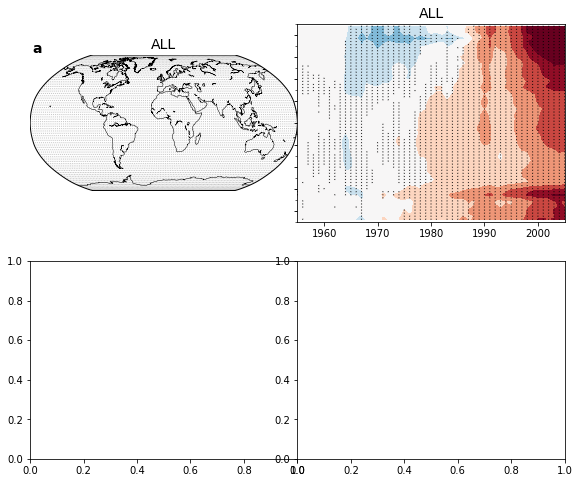

In [6]:
#==========================================================
#3e. Combination spatial maps+Hoffmoller - ALL+FixODS
#==========================================================

############### Setup fig
fig2, axs = plt.subplots(2,2, figsize=(11,8)); 
fig2.subplots_adjust(hspace=0.2,wspace=0,right=0.8)

############### historical

plot_lonlat(axs[0,0],data_lonlat['historical'],labels['historical'],'a')
plot_latyear(axs[0,1],data_latyear['historical'],labels['historical'],plot_ylabel=False)



#plot_lonlat(axs[0,1],data_lonlat['hist-noCFC-noO3'],labels['hist-noCFC-noO3'],'b')
#plot_lonlat_diff(axs[1,0],data_lonlat['historical'],data_lonlat['hist-noCFC-noO3'],'ALL - '+labels['hist-noCFC-noO3'],'c')
#plot_lonlat_diff(axs[1,1],data_lonlat['historical'],data_lonlat['hist-noCFC'],'ALL - '+labels['hist-noCFC'],'d')
#plot_lonlat_diff(axs[2,0],data_lonlat['historical'],data_lonlat['hist-noCO2'],'ALL - '+labels['hist-noCO2'],'e')
#cf=plot_lonlat_diff(axs[2,1],data_lonlat['historical'],data_lonlat['hist-noaerosol'],'ALL - '+labels['hist-noaerosol'],'f')
#rpl1.add_cb(axs[2,1],cf,lscale=3.5,units='$^\circ$C')

##save
#fig1.suptitle('TAS change')
rpl1.mysavefig(fig2,'PLOTS/fig2_cfc_all+fixodso3.png')







